# 1. Histogramas

In [183]:
"""This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data.
If n_hist is not provided the default value is 100."""
function super_histograma(vec::Array,n_hist=100)
    N_ord = sort(vec)
    
    dx = (N_ord[end]-N_ord[1])/n_hist
    x_1 = N_ord[1]

    histo = zeros(n_hist)
      
    for k = 1 : length(N_ord)
        
        x_1 = N_ord[1]
        
        for j = 1 : length(histo)
            
            x_2 = x_1 + dx
            
            if N_ord[k] >= x_1 && N_ord[k] <= x_2
                
                histo[j] += 1
                break
                
            else
                x_1 += dx
            
            end
        end
    end
    return histo
end

super_histograma (generic function with 2 methods)

Nuestra función está bien documentada. Veamos esto:

In [184]:
?super_histograma

search: super_histograma



This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data. If n_hist is not provided the default value is 100.


Probemos ahora con un vector `M` de ~ 10,000 entradas.

In [185]:
M = randn(10000);

Saquemos el histograma de `M` con nuestra gran función `super_histograma()`. 

In [186]:
h = super_histograma(M,100)

100-element Array{Float64,1}:
 2.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 4.0
 1.0
 5.0
 ⋮  
 9.0
 2.0
 4.0
 5.0
 4.0
 2.0
 2.0
 2.0
 1.0
 0.0
 0.0
 1.0

Finalmente, grafiquemos el histograma de `M`.

**Nota:** Se graficó histograma vs rango($n_{hist}$) con fines ilustrativos solamente.

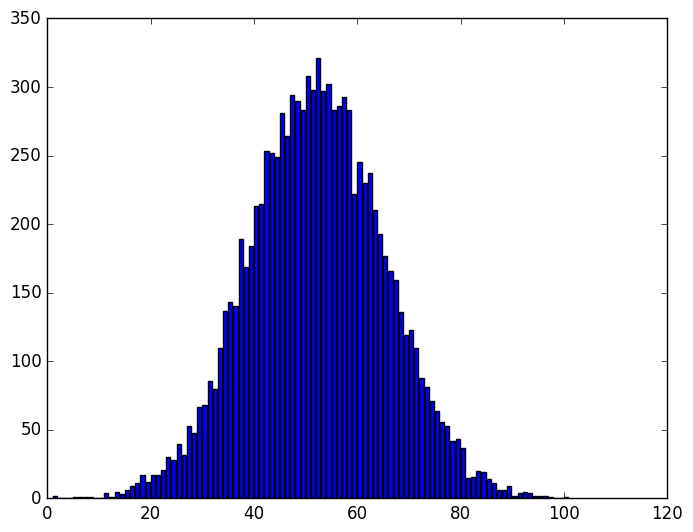

In [187]:
using PyPlot
bar(1:100,h);

# 3. Método de Simpson para integrar

El *método de Simpson* es un método de integración numérica para la aproximación de integrales definidas en un intervalo *(a,b)*.

Sigue esta forma:
$$\int_a^b f(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$
Definiremos ahora la función `simpson()` que nos permitirá aproximar la integral de cualquier función en un intervalo *(a,b)*:

In [188]:
"""This is the Simpson's rule for numerical integration, proposed by mathematician Thomas Simpson.
It accepts as parameters function f, two numbers a,b that define the interval inside which the integral of f will be approximated and an integer n which divide (b-a) evenly."""
function simpson(f::Function,a,b)
    integral = (b-a)/6 * (f(a)+4*f((a+b)/2)+f(b));
    return integral
end

simpson (generic function with 1 method)

Si el intervalo *(a,b)* es suficientemente pequeño, la función `simpson()` nos da una aproximación adecuada de la integral. Pero si la función no es tan *suave* en el intervalo (o es muy oscilatoria) no es suficiente esta aproximación.

Así, si partimos nuestro intervalo en *n* (par) segmentos iguales, podemos hacer el método de Simpson en cada uno de esos segmentos para obtener una mejor aproximación a nuestra integral:
$$ \int_a^b f(x)dx \approx \frac{h}{3} \left[ f(x_0) + 2 \sum _{j=1}^{n/2-1} f(x_{2j}) + 4\sum_{j = 1}^{n/2} f(x_{2j-1}) + f(x_n)\right] $$

donde $x_0 = a$ y $x_n = b$.

In [189]:
"""General form of simpson(), that takes an additional input n - the number of subintervals of (a,b). Refer to ?simpson."""
function simpson2(f::Function,a,b,n::Int64=100)
    
    if n<= 0 # Chequeamos si es no positivo
        error("N negativo")
    end
    
    n += n % 2; # Nos aseguramos que sea suma sobre los pares.
    h = (b-a)/n;
    
    x = a+h:h:b-h; # El rango sobre el cual integraremos.
    
    integral = f(a)+f(b); # Fijamos el valor no iterativo de la integral.
    
    N = convert(Int64,(n/2)) # Convertimos el índice a entero.
    
    for k = 1 : (N-1) # Primer término de la suma.
        integral += 2*f(x[2*k])
    end
    
    for k = 1 : N # Segundo término de la suma.
        integral += 4*f(x[2*k-1]) 
    end
    
    return integral*h/3
end

simpson2 (generic function with 2 methods)

Definamos nuestra función prueba como $f(x) = x^2$.

In [190]:
f(x) = x^2

f (generic function with 1 method)

Sabemos que la integral de $f(x) = x^2$ es $\frac{x^3}{3}$ y, evaluada de 0 a 1, nos da un valor de $\approx 0.333333$. Veamos si nuestra función es acertada.

In [191]:
simpson2(f,0,1,100)

0.3333333333333333

Finalmente veamos que si tomamos el intervalo inverso (i.e., el (1,0)), nos da el negativo de la integral.

In [192]:
simpson2(f,1,0,100)

-0.3333333333333332

Ahora, comparemos la eficiencia de `simpson()` con su forma generalizada `simpson2()`, para $g(x) = sin(x)$, de 0 a $\pi$.

In [193]:
g(x) = sin(x);

In [194]:
simpson(g,0,pi)

2.0943951023931953

In [195]:
simpson2(g,0,pi,100)

2.000000010824504

Como vemos, en este caso `simpson2()` es MUCHO más precisa para aproximar la integral.